In [2]:
# modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

In [3]:
# import dataset from archive txt tabulate
df = pd.read_csv('datasets/animal_aging_data.txt', sep='\t', lineterminator='\n')

df

,HAGRID,Kingdom,Phylum,Class,Order,Family,Genus,Species,Common name,Female maturity (days),...,Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References\r
0,00003,Animalia,Arthropoda,Branchiopoda,Diplostraca,Daphniidae,Daphnia,pulicaria,Daphnia,NaN,...,NaN,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"1294,1295,1296\r"
1,00005,Animalia,Arthropoda,Insecta,Diptera,Drosophilidae,Drosophila,melanogaster,Fruit fly,7.0,...,NaN,captivity,large,acceptable,0.05,0.04,NaN,NaN,NaN,"2,20,32,47,53,68,69,240,241,242,243,274,602,98..."
2,00006,Animalia,Arthropoda,Insecta,Hymenoptera,Apidae,Apis,mellifera,Honey bee,NaN,...,812,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"63,407,408,741,805,806,808,812,815,828,830,831..."
3,00008,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Cardiocondyla,obscurior,Cardiocondyla obscurior,NaN,...,1293,captivity,medium,acceptable,NaN,NaN,NaN,NaN,NaN,1293\r
4,00009,Animalia,Arthropoda,Insecta,Hymenoptera,Formicidae,Lasius,niger,Black garden ant,NaN,...,411,unknown,medium,acceptable,NaN,NaN,NaN,NaN,NaN,"411,813,814\r"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4219,\r,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4220,\r,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4221,\r,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4222,\r,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(4219, 31)

In [4]:
# we'll see how many y what kingdom we have
kingdoms = df['Kingdom'].unique()

('We have {} and they are: {}').format(len(kingdoms), kingdoms)

"We have 3 and they are: ['Animalia' 'Plantae' 'Fungi']"

In [5]:
# we'll see how many and what phylums by kingdom we have
phylums = df.groupby('Kingdom')['Phylum'].unique()

df_kingdom_phylum = pd.DataFrame(phylums)

df_kingdom_phylum['n'] = [len(df[df['Kingdom'] == x]['Phylum'].unique()) for x in df['Kingdom'].unique()]

df_kingdom_phylum

,Phylum,n
Kingdom,,
Animalia,"[Arthropoda, Chordata, Cnidaria, Echinodermata...",7
Fungi,[Ascomycota],1
Plantae,[Pinophyta],1


In [6]:
# we'll see the columns
df.columns

Index(['HAGRID', 'Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Genus',
       'Species', 'Common name', 'Female maturity (days)',
       'Male maturity (days)', 'Gestation/Incubation (days)', 'Weaning (days)',
       'Litter/Clutch size', 'Litters/Clutches per year',
       'Inter-litter/Interbirth interval', 'Birth weight (g)',
       'Weaning weight (g)', 'Adult weight (g)', 'Growth rate (1/days)',
       'Maximum longevity (yrs)', 'Source', 'Specimen origin', 'Sample size',
       'Data quality', 'IMR (per yr)', 'MRDT (yrs)', 'Metabolic rate (W)',
       'Body mass (g)', 'Temperature (K)', 'References'],
      dtype='object')

In [7]:
# we will see the Female maturity (days) in the different phylums of kingdom animalia (only data avalible)
fmadurity = df[df['Kingdom'] == 'Animalia'][['Phylum', 'Female maturity (days)']].dropna()

fmadurity

,Phylum,Female maturity (days)
1,Arthropoda,7.0
6,Arthropoda,15.0
8,Chordata,1095.0
11,Chordata,910.0
12,Chordata,1095.0
...,...,...
4207,Chordata,1277.0
4209,Echinodermata,550.0
4210,Echinodermata,730.0
4211,Mollusca,4562.0


In [8]:
# we'll see in order, first 5 entries and the last 5
df2 = fmadurity.sort_values(by = 'Female maturity (days)', ascending = False)
first5 = df2.head(5)
last5 = df2.tail(5)

pd.concat([first5, last5], axis = 0)

,Phylum,Female maturity (days)
1496,Chordata,56940.0
1490,Chordata,16060.0
4206,Chordata,11315.0
1493,Chordata,10950.0
4203,Chordata,9855.0
2535,Chordata,28.0
2501,Chordata,24.0
6,Arthropoda,15.0
1,Arthropoda,7.0
4212,Nematoda,3.0


In [9]:
# As we can see, chordata is a very big Phylum
nochordata = df[df['Phylum'] != 'Chordata']['Phylum'].count()
chordata = df[df['Phylum'] == 'Chordata']['Phylum'].count()

print("Chordata phylum have {} entries, while non-Chordata phylum have {} entries".format(chordata, nochordata))

Chordata phylum have 4200 entries, while non-Chordata phylum have 19 entries


In [10]:
# then, we have to see another classification querry. Order.

In [11]:
df3 = df[['Order', 'Female maturity (days)']].sort_values('Female maturity (days)', ascending = False).dropna()

first5 = df3.head(5)
last5 = df3.tail()

pd.concat([first5, last5], axis = 0)

,Order,Female maturity (days)
1496,Squaliformes,56940.0
1490,Squaliformes,16060.0
4206,Zeiformes,11315.0
1493,Squaliformes,10950.0
4203,Zeiformes,9855.0
2535,Rodentia,28.0
2501,Rodentia,24.0
6,Lepidoptera,15.0
1,Diptera,7.0
4212,Rhabditida,3.0


In [12]:
# now, we'll see Female maturity (days)' and 'Gestation/Incubation (days)' by Order
df4 = df[['Order', 'Female maturity (days)', 'Gestation/Incubation (days)']].dropna()

df4

,Order,Female maturity (days),Gestation/Incubation (days)
11,Anura,910.0,8.0
12,Anura,1095.0,6.0
13,Anura,1825.0,11.0
14,Anura,730.0,4.0
29,Anura,365.0,2.0
...,...,...,...
3582,Cypriniformes,60.0,5.0
3855,Perciformes,1095.0,2.0
3923,Perciformes,730.0,20.0
4078,Salmoniformes,1095.0,140.0


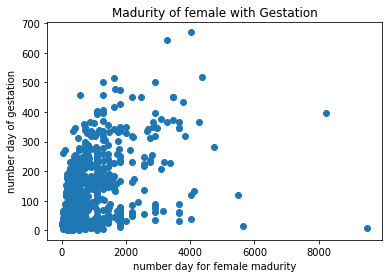

In [13]:
# we performace a plot with this data, where x-axis is Female maturity (days) and y-axis is Gestation/Incubation (days)

#matplotlib inline
%matplotlib inline

# define axis
xaxis = df4['Female maturity (days)']
yaxis = df4['Gestation/Incubation (days)']

#  performance plot
plt.plot(xaxis, yaxis, "o")

# name axis and tittle
plt.title("Madurity of female with Gestation")
plt.xlabel("number day for female madurity")
plt.ylabel("number day of gestation")


# show the plot
plt.show()

We can't see much with this graph, so we'll try to use another type of graph.

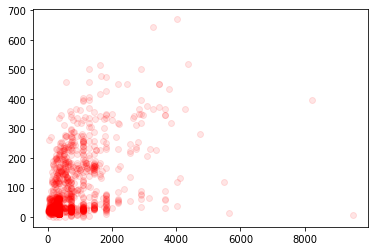

In [14]:
# scatterplot

# matplotlib inline
%matplotlib inline

# same data by later plot

# scatterplot
plt.scatter(x = xaxis, y = yaxis, color = 'red', alpha = .1)

plt.show()

Scatterplot and plot, show the same. We have to plot with colors. before, we neet to see the ideal groupings.

In [15]:
# we'll see how many group we have with thas data

# data
df5 = df[['Kingdom', 'Phylum', 'Class', 'Order', 'Family', 'Female maturity (days)', 'Gestation/Incubation (days)']].dropna()

# we see how many group of each column
print('Kingdom have a {} groups'.format(len(df5['Kingdom'].unique())))
print('Phylum have a {} groups'.format(len(df5['Phylum'].unique())))
print('Class have a {} groups'.format(len(df5['Class'].unique())))
print('Order have a {} groups'.format(len(df5['Order'].unique())))

Kingdom have a 1 groups
Phylum have a 1 groups
Class have a 6 groups
Order have a 58 groups


The best option is to classify by Class.

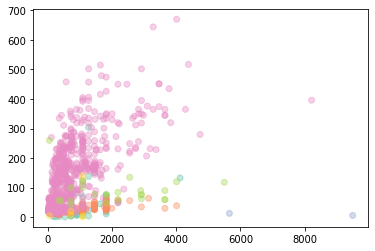

In [16]:
# scatterplot with color by Class

# matplotlib inline
%matplotlib inline

# generate a color palette with seaborn
rgb_colors = sns.color_palette("Set2", 6)

# select data
xaxis = df5['Female maturity (days)']
yaxis = df5['Gestation/Incubation (days)']
col_byclass = df5['Class'].unique()

color_map = dict(zip(col_byclass, rgb_colors))

# scatterplot
plt.scatter(x = xaxis, y = yaxis, c = df5['Class'].map(color_map), alpha = .4)

You can't see something clearly.


However, we are still looking for other relationships. One easy way is to create a correlation matrix.

In [17]:
df[['Female maturity (days)','Male maturity (days)', 'Gestation/Incubation (days)', 'Weaning (days)',
    'Litter/Clutch size', 'Litters/Clutches per year',
    'Inter-litter/Interbirth interval', 'Birth weight (g)',
    'Weaning weight (g)', 'Adult weight (g)', 'Growth rate (1/days)',
    'Maximum longevity (yrs)', 'Source', 'Specimen origin', 'Sample size',
    'Data quality', 'IMR (per yr)', 'MRDT (yrs)', 'Metabolic rate (W)',
    'Body mass (g)', 'Temperature (K)', 'References']].dropna()

,Female maturity (days),Male maturity (days),Gestation/Incubation (days),Weaning (days),Litter/Clutch size,Litters/Clutches per year,Inter-litter/Interbirth interval,Birth weight (g),Weaning weight (g),Adult weight (g),...,Source,Specimen origin,Sample size,Data quality,IMR (per yr),MRDT (yrs),Metabolic rate (W),Body mass (g),Temperature (K),References
2373,1514.0,1762.0,171.0,300.0,1.0,0.8,568.0,814.00,3950.0,18000.0,...,671,captivity,large,high,0.0600,4.0,21.095,12670.8,311.15,"9,36,59,149,150,151,152,153,154,155,156,157,15..."
2407,4745.0,5110.0,280.0,639.0,1.0,0.3,639.0,3312.50,11750.0,62035.0,...,29,captivity,huge,high,0.0002,8.0,82.780,70000.0,310.15,"2,13,14,29,30,31,36,58,59,65,75,76,110,111,121..."
2680,42.0,42.0,19.0,22.0,7.0,5.4,30.0,1.25,8.9,20.5,...,506,captivity,large,high,0.0100,0.3,0.271,18.0,310.05,"2,11,13,14,36,51,53,59,69,110,217,248,272,305,..."


There is no point in making a correlation matrix with only 3 records, so we are going to look for the largest number of variables that have the largest number of rows or records.

In [24]:
# we create a variable with all variables names
varrs = ['Female maturity (days)','Male maturity (days)', 'Gestation/Incubation (days)', 'Weaning (days)',
    'Litter/Clutch size', 'Litters/Clutches per year',
    'Inter-litter/Interbirth interval', 'Birth weight (g)',
    'Weaning weight (g)', 'Adult weight (g)', 'Growth rate (1/days)',
    'Maximum longevity (yrs)', 'Source', 'Specimen origin', 'Sample size',
    'Data quality', 'IMR (per yr)', 'MRDT (yrs)', 'Metabolic rate (W)',
    'Body mass (g)', 'Temperature (K)', 'References']

len(varrs)

22

In [97]:
# we create a list of combinations of two values
varr_two_combinations = list(combinations(varrs, 2))

# and we see which of all thems have more rows
n_row_two_varrs = pd.DataFrame([list([x, df[list(x)].dropna().size]) for x in varr_two_combinations])

n_row_two_varrs.sort_values(1, ascending = False).head(10)

,0,1
195,"(Specimen origin, Sample size)",8438
196,"(Specimen origin, Data quality)",8438
203,"(Sample size, Data quality)",8438
202,"(Specimen origin, References)",8430
215,"(Data quality, References)",8430
209,"(Sample size, References)",8430
179,"(Maximum longevity (yrs), Data quality)",7554
177,"(Maximum longevity (yrs), Specimen origin)",7554
178,"(Maximum longevity (yrs), Sample size)",7554
185,"(Maximum longevity (yrs), References)",7548


We see that the pairs of variables always include size, quality and references. We have to eliminate those variables.

In [101]:
# eliminate Sample size, Data quality and references, specimen origin, source
varrs = ['Female maturity (days)','Male maturity (days)', 'Gestation/Incubation (days)', 'Weaning (days)',
    'Litter/Clutch size', 'Litters/Clutches per year',
    'Inter-litter/Interbirth interval', 'Birth weight (g)',
    'Weaning weight (g)', 'Adult weight (g)', 'Growth rate (1/days)',
    'Maximum longevity (yrs)', 
    'IMR (per yr)', 'MRDT (yrs)', 'Metabolic rate (W)',
    'Body mass (g)', 'Temperature (K)']

# we create a list of combinations of two values
varr_two_combinations = list(combinations(varrs, 2))

# and we see which of all thems have more rows
n_row_two_varrs = pd.DataFrame([list([x, df[list(x)].dropna().size]) for x in varr_two_combinations])

n_row_two_varrs.sort_values(1, ascending = False).head(10)

,0,1
109,"(Adult weight (g), Maximum longevity (yrs))",5120
62,"(Litter/Clutch size, Adult weight (g))",3824
10,"(Female maturity (days), Maximum longevity (yrs))",3732
8,"(Female maturity (days), Adult weight (g))",3620
64,"(Litter/Clutch size, Maximum longevity (yrs))",3504
0,"(Female maturity (days), Male maturity (days))",3366
32,"(Gestation/Incubation (days), Litter/Clutch size)",3318
37,"(Gestation/Incubation (days), Adult weight (g))",3294
25,"(Male maturity (days), Maximum longevity (yrs))",3122
3,"(Female maturity (days), Litter/Clutch size)",3102
